In [1]:
import cv2
import numpy as np
import time
from skimage.feature import hog
from sklearn.externals import joblib
from nms import nms
import argparse
import matplotlib.pyplot as plt
import os 
import csv

In [2]:
def overlapping_area(detection_1, detection_2):
    x1_tl = detection_1[0]
    x2_tl = detection_2[0]
    x1_br = detection_1[0] + detection_1[3]
    x2_br = detection_2[0] + detection_2[3]
    y1_tl = detection_1[1]
    y2_tl = detection_2[1]
    y1_br = detection_1[1] + detection_1[4]
    y2_br = detection_2[1] + detection_2[4]
    # Calculate the overlapping Area
    x_overlap = max(0, min(x1_br, x2_br)-max(x1_tl, x2_tl))
    y_overlap = max(0, min(y1_br, y2_br)-max(y1_tl, y2_tl))
    overlap_area = x_overlap * y_overlap
    area_1 = detection_1[3] * detection_2[4]
    area_2 = detection_2[3] * detection_2[4]
    total_area = area_1 + area_2 - overlap_area
    return overlap_area / float(total_area)


def nms(detections, threshold=.5):
    detections = sorted(detections, key=lambda detections: detections[2],
            reverse=True)
    new_detections=[]
    new_detections.append(detections[0])
    del detections[0]
    for index, detection in enumerate(detections):
        for new_detection in new_detections:
            if overlapping_area(detection, new_detection) > threshold:
                del detections[index]
                break
        else:
            new_detections.append(detection)
            del detections[index]
    return new_detections


def appendRects(i, j, conf, c, rects):
    x = int((j)*pow(scaleFactor, c))
    y = int((i)*pow(scaleFactor, c))
    w = int((64)*pow(scaleFactor, c))
    h = int((128)*pow(scaleFactor, c))
    rects.append((x, y, conf, w, h))

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img)
    return images 

In [5]:
slike = load_images_from_folder("skup_podataka/test")

br_slike = 0
lista = []
print("br slika:", len(slike))

clf = joblib.load("pedestrian.pkl")
scaleFactor = 1.2
inverse = 1.0/scaleFactor
winStride = (8, 8)
winSize = (128, 64)
for img in slike:
    print("slika", br_slike + 1)
    gray = img.copy()

    rects = []
    h, w = gray.shape
    count = 0
    while (h >= 128 and w >= 64):
        h, w= gray.shape
        horiz = w - 64
        vert = h - 128
        i = 0
        j = 0
        while i < vert:
            j = 0
            while j < horiz:
                portion = gray[i:i+winSize[0], j:j+winSize[1]]
                features = hog(portion, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L2")
                result = clf.predict([features])
                visual = gray.copy()
                cv2.rectangle(visual, (j, i), (j+winSize[1], i+winSize[0]), (0, 0, 255), 2)
                if int(result[0]) == 1:
                    confidence = clf.decision_function([features])
                    appendRects(i, j, confidence, count, rects)
                j = j + winStride[0]
            i = i + winStride[1]
        gray = cv2.resize(gray, (int(w*inverse), int(h*inverse)), interpolation=cv2.INTER_AREA)
        count = count + 1
    nms_rects = nms(rects, 0.2)
    br = 0
    br_slike += 1
    for (a, b, conf, c, d) in nms_rects:
        if ((c-a > 50 and d-b > 100) or (c-a > 100 and d-b > 50)):
            br += 1
    lista.append(br)

print(lista)

br slika: 150


D:\soft_vezbe\sc-2021-siit\env\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


slika 1
slika 2
slika 3
slika 4
slika 5
slika 6
slika 7
slika 8
slika 9
slika 10
slika 11
slika 12
slika 13
slika 14
slika 15
slika 16
slika 17
slika 18
slika 19
slika 20
slika 21
slika 22
slika 23
slika 24
slika 25
slika 26
slika 27
slika 28
slika 29
slika 30
slika 31
slika 32
slika 33
slika 34
slika 35
slika 36
slika 37
slika 38
slika 39
slika 40
slika 41
slika 42
slika 43
slika 44
slika 45
slika 46
slika 47
slika 48
slika 49
slika 50
slika 51
slika 52
slika 53
slika 54
slika 55
slika 56
slika 57
slika 58
slika 59
slika 60
slika 61
slika 62
slika 63
slika 64
slika 65
slika 66
slika 67
slika 68
slika 69
slika 70
slika 71
slika 72
slika 73
slika 74
slika 75
slika 76
slika 77
slika 78
slika 79
slika 80
slika 81
slika 82
slika 83
slika 84
slika 85
slika 86
slika 87
slika 88
slika 89
slika 90
slika 91
slika 92
slika 93
slika 94
slika 95
slika 96
slika 97
slika 98
slika 99
slika 100
slika 101
slika 102
slika 103
slika 104
slika 105
slika 106
slika 107
slika 108
slika 109
slika 110
slika 11

In [9]:
resenje = []
with open('skup_podataka/test_podaci.csv', encoding="utf8", newline='\n') as f:
    lines = csv.reader(f, delimiter=',')
    for row in lines:
        if (row[0] == "br_knjiga"):
            continue
        resenje.append(int(row[0]))
        
print(resenje)
br_tacnih = 0
for ind in range(br_slike):
    if (resenje[ind] == lista[ind]):
        br_tacnih += 1

print("Tacnost:", (br_tacnih / br_slike) * 100, "%")

[0, 0, 3, 0, 3, 3, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 5, 3, 2, 2, 0, 2, 3, 3, 2, 0, 1, 3, 0, 0, 1, 2, 1, 1, 1, 0, 3, 0, 2, 0, 1, 1, 0, 1, 3, 2, 0, 1, 0, 0, 1, 2, 2, 3, 4, 0, 3, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 3, 3, 7, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 3, 2, 0, 4, 0, 1, 1, 0, 2, 1, 2, 1, 0, 3, 3, 1, 0, 0, 3, 1, 1, 0, 1, 1, 3, 0, 2, 2, 1, 0]
Tacnost: 25.333333333333336 %


D:\soft_vezbe\sc-2021-siit\env\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


pocetak
kraaaj
broj kontura 2


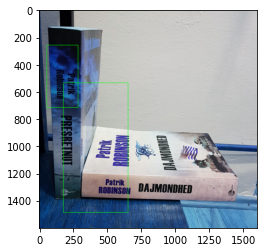

In [3]:
clf = joblib.load("pedestrian.pkl")
orig = cv2.imread("skup_podataka\saKnjigom\saKnjigom2.jpg")
img = orig.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
scaleFactor = 1.2
inverse = 1.0/scaleFactor
winStride = (8, 8)
winSize = (128, 64)

print ("pocetak")
rects = []
h, w = gray.shape
count = 0
while (h >= 128 and w >= 64):
    h, w= gray.shape
    horiz = w - 64
    vert = h - 128
    i = 0
    j = 0
    while i < vert:
        j = 0
        while j < horiz:
            portion = gray[i:i+winSize[0], j:j+winSize[1]]
            features = hog(portion, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L2")
            result = clf.predict([features])
            visual = gray.copy()
            cv2.rectangle(visual, (j, i), (j+winSize[1], i+winSize[0]), (0, 0, 255), 2)
            if int(result[0]) == 1:
                confidence = clf.decision_function([features])
                appendRects(i, j, confidence, count, rects)
            j = j + winStride[0]
        i = i + winStride[1]
    gray = cv2.resize(gray, (int(w*inverse), int(h*inverse)), interpolation=cv2.INTER_AREA)
    count = count + 1
print ("kraaaj")
            
nms_rects = nms(rects, 0.2)
for (a, b, conf, c, d) in rects:
    cv2.rectangle(orig, (a, b), (a+c, b+d), (0, 255, 0), 2)
plt.imshow(orig, 'gray')
br = 0
for (a, b, conf, c, d) in nms_rects:
    if ((c-a > 50 and d-b > 100) or (c-a > 100 and d-b > 50)):
        br += 1
        cv2.rectangle(img, (a, b), (a+c, b+d), (0, 255, 0), 2)
plt.imshow(img, 'gray')
print("broj kontura", br)